In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv('/Users/deepakraj/Desktop/Mall_Customers.csv')

# Drop rows with missing values
df.dropna(inplace=True)

In [3]:
# Display first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Check for any duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

#### Basic Statistics Summary

In [6]:
# Display statistical summary of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Skewness

In [7]:
# Calculate skewness for numeric columns
skewness = df.skew(numeric_only=True)
print(skewness)

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


#### Kurtosis

In [8]:
# Calculate kurtosis for numeric columns
kurtosis = df.kurt(numeric_only=True)
print(kurtosis)

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64


#### Correlation Matrix

In [9]:
# Calculate correlation matrix for numeric columns
corr = df.corr(method='pearson', numeric_only=True)
print(corr)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


#### Heatmap

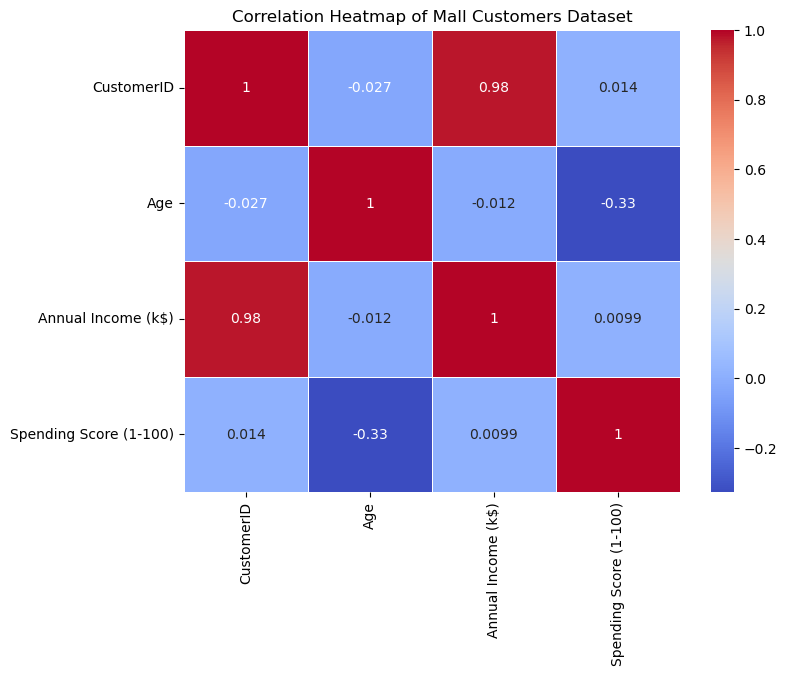

In [10]:
def plot_correlation_heatmap():
    """
    It plots a heatmap for the correlation matrix of Age, Annual Income & Spending Score
    """
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
    plt.title('Correlation Heatmap of Mall Customers Dataset')
    plt.show()

plot_correlation_heatmap()

#### Bar Chart

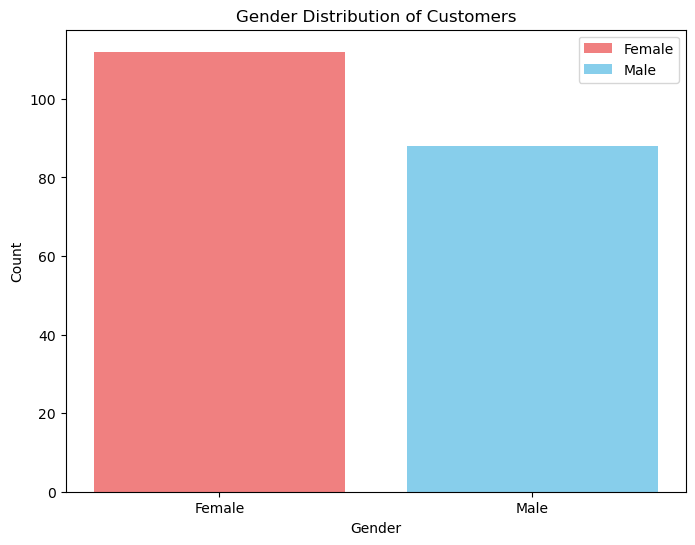

In [9]:
def plot_barchart():
    """
    It plots a bar chart showing the gender distribution of customers
    """
    gender_counts = df['Gender'].value_counts()
    plt.figure(figsize=(8,6))
    plt.bar(gender_counts.index, gender_counts.values, color=['lightcoral', 'skyblue'], label=['Female', 'Male'])
    plt.title('Gender Distribution of Customers')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

plot_barchart()

#### Scatter Plot

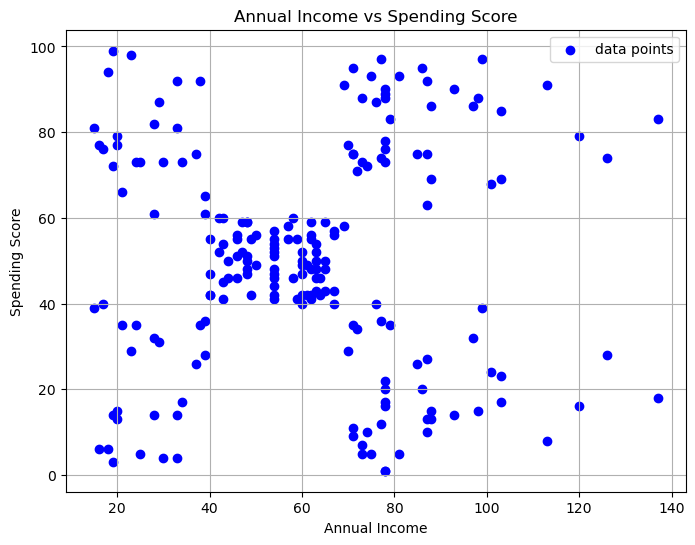

In [8]:
def plot_scatterplot():
    """
    This Scatter plot shows relation between Annual Income and Spending Score
    """
    plt.figure(figsize=(8,6))
    plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', label='data points')
    plt.title('Annual Income vs Spending Score')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_scatterplot()

#### Elbow Plot

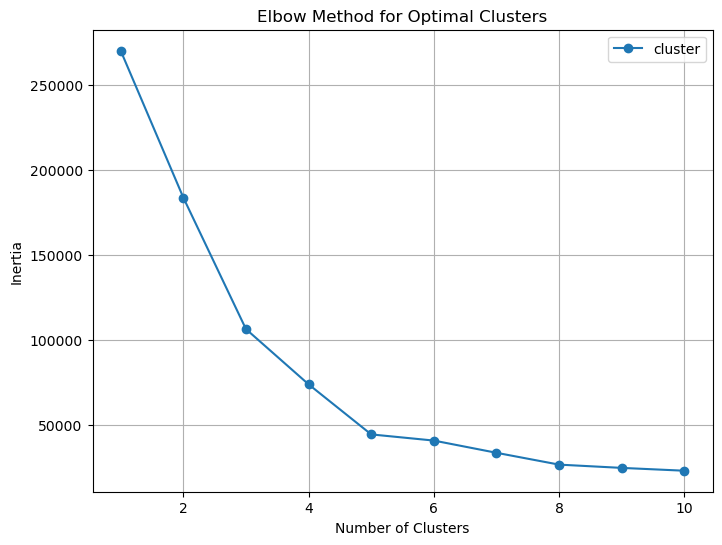

In [7]:
def plot_elbow_method():
    """
    It plots the elbow method to find the optimal number of clusters
    """
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    inertia = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(1,11), inertia, marker='o', label='cluster')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_elbow_method()

#### K-means Clustering

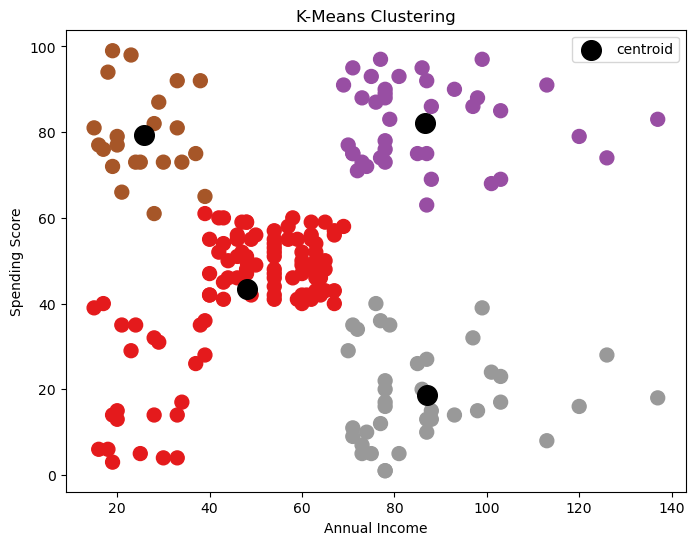

In [5]:
def perform_kmeans_clustering():
    """
    It performs K-means clustering on the dataset and plots the clusters
    """
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='Set1', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='centroid')
    plt.title('K-Means Clustering')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

perform_kmeans_clustering()

#### Fitting

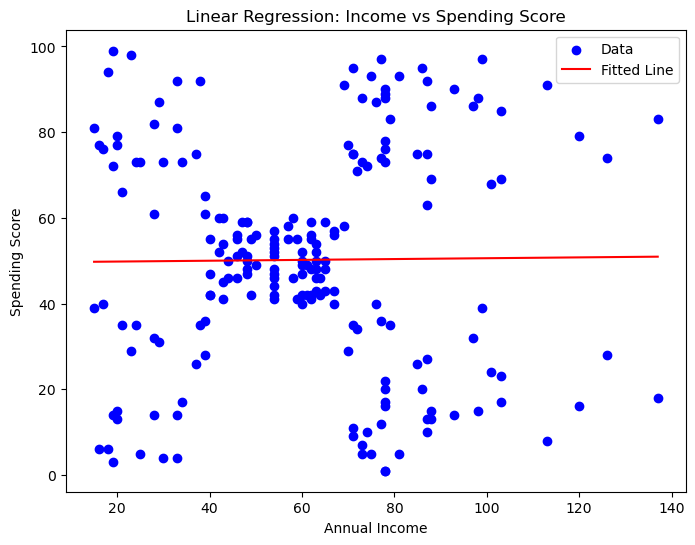

In [6]:
def perform_linear_regression():
    """
    It performs linear regression on the dataset and fits a line
    """
    x = df[['Annual Income (k$)']].values
    y = df[['Spending Score (1-100)']].values
    model = LinearRegression()
    model.fit(x,y)
    y_pred = model.predict(x)
    plt.figure(figsize=(8,6))
    plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', label='Data')
    plt.plot(df['Annual Income (k$)'], y_pred, color='red', label='Fitted Line')
    plt.title('Linear Regression: Income vs Spending Score')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

perform_linear_regression()

#### Clustering Prediction

In [16]:
def clustering_prediction(new_data):
    """
    It Predicts the cluster for a new data point based on Annual Income and Spending Score
    """
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X)

    new_data_df = pd.DataFrame([new_data], columns=['Annual Income (k$)', 'Spending Score (1-100)'])
    
    # Predict cluster for the new data point
    cluster = kmeans.predict(new_data_df)
    print(f"The predicted cluster for the new data point {new_data} is: Cluster {cluster[0]}")

# Predicting the cluster for a new data point
clustering_prediction([260, 9])

The predicted cluster for the new data point [260, 9] is: Cluster 3


#### Fitting Prediction

In [17]:
def fitting_prediction(new_data):
    """
    It Predicts the Spending Score based on Annual Income using the trained linear regression model
    """
    x = df[['Annual Income (k$)']].values
    y = df[['Spending Score (1-100)']].values
    
    # Train the model
    model = LinearRegression()
    model.fit(x, y)
    
    # Predict the spending score for new data
    prediction = model.predict([new_data])
    print(f"Predicted Spending Score for Annual Income = {new_data[0]}k$ is: {prediction[0][0]:.2f}")
    
# Predicting the spending score for a new data point
fitting_prediction([40])

Predicted Spending Score for Annual Income = 40k$ is: 50.00
